In [12]:
import pandas as pd
import numpy as np
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [13]:
df = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)
print(df.head())
print("Jumlah data:", len(df))

                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0  
Jumlah data: 26709


In [14]:
# Ambil fitur dan label
texts = df['headline'].values
labels = df['is_sarcastic'].values

# Parameter tokenisasi
max_vocab =       # batas maksimal jumlah kata
max_length =         # panjang maksimal sequence (dapat disesuaikan)

# Tokenisasi
tokenizer = Tokenizer(num_words=max_vocab, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)
print("Ukuran train:", X_train.shape, "Ukuran test:", X_test.shape)

Ukuran train: (21367, 30) Ukuran test: (5342, 30)


In [15]:
# Hyperparameter umum
embedding_dim =
units =
drop_rate =

def create_rnn_model():


    return model

def create_lstm_model():


    return model

def create_gru_model():


    return model

In [16]:
epochs =
batch_size =

# Buat dan latih model RNN
rnn_model = create_rnn_model()
history_rnn = rnn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                            validation_split=0.1, verbose=1)
rnn_loss, rnn_acc = rnn_model.evaluate(X_test, y_test)
print("RNN Test Accuracy:", rnn_acc)

# Buat dan latih model LSTM
lstm_model = create_lstm_model()
history_lstm = lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              validation_split=0.1, verbose=1)
lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test)
print("LSTM Test Accuracy:", lstm_acc)

# Buat dan latih model GRU
gru_model = create_gru_model()
history_gru = gru_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                            validation_split=0.1, verbose=1)
gru_loss, gru_acc = gru_model.evaluate(X_test, y_test)
print("GRU Test Accuracy:", gru_acc)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


601/601 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5427 - loss: 0.6976 - val_accuracy: 0.5517 - val_loss: 0.6776
Epoch 2/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5988 - loss: 0.6625 - val_accuracy: 0.7403 - val_loss: 0.5349
Epoch 3/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7725 - loss: 0.4979 - val_accuracy: 0.7688 - val_loss: 0.5093
Epoch 4/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8332 - loss: 0.4037 - val_accuracy: 0.7805 - val_loss: 0.5064
Epoch 5/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8607 - loss: 0.3449 - val_accuracy: 0.7852 - val_loss: 0.4911
Epoch 6/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8702 - loss: 0.3209 - val_accuracy: 0.7871 - val_loss: 0.5075
Epoch 7/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8833 - loss: 0.2901 - val_accuracy: 0.7801 - val_loss: 0.5683
Epoch 8/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9061 - loss: 0.2559 - val_accuracy: 0.7908 - va

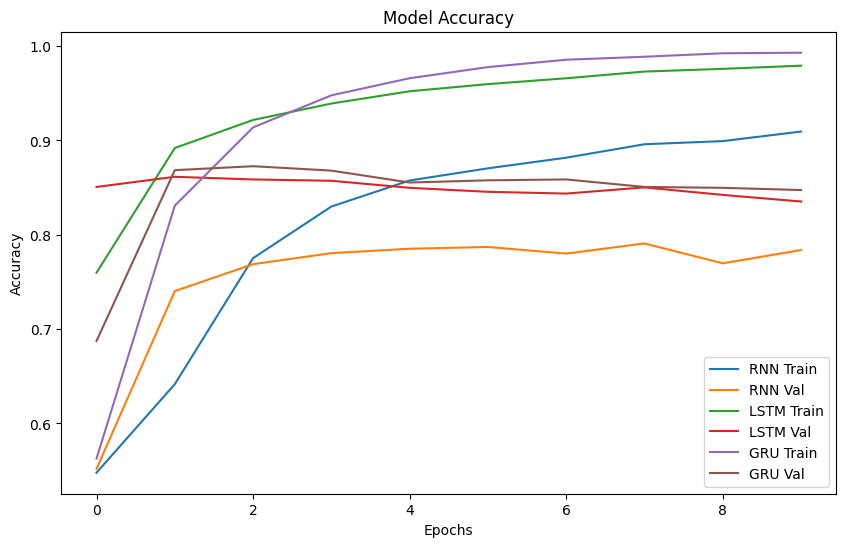

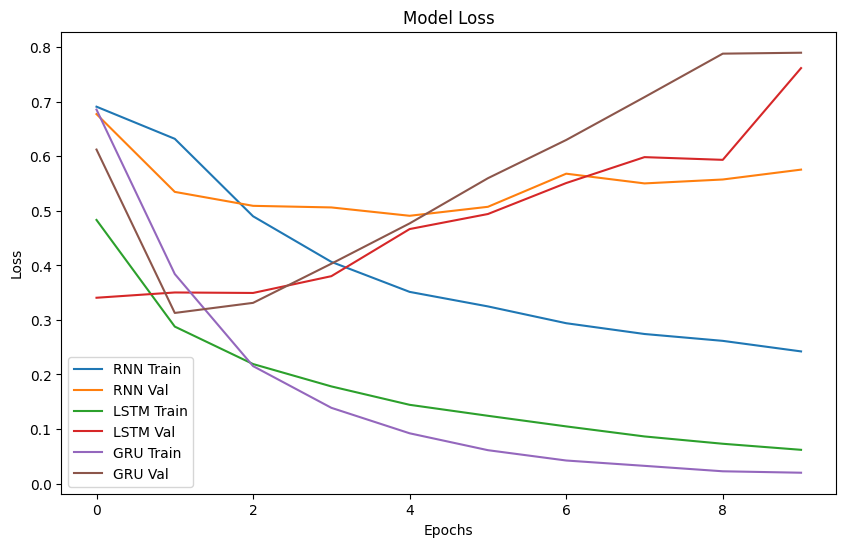

In [17]:
# Fungsi untuk plot
def plot_history(histories, metric='accuracy'):
    plt.figure(figsize=(10, 6))
    for name, history in histories.items():
        plt.plot(history.history[metric], label=f'{name} Train')
        plt.plot(history.history['val_' + metric], label=f'{name} Val')
    plt.title(f'Model {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

histories = {'RNN': history_rnn, 'LSTM': history_lstm, 'GRU': history_gru}
plot_history(histories, metric='accuracy')
plot_history(histories, metric='loss')

**Seperti pada grafik diatas, model komplek cenderung overfitting. maka dilakukan hyperparameter tuning dengan library keras tuner**

In [19]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.7 MB/s eta 0:00:00


In [20]:
# Pastikan Keras Tuner sudah terinstall: pip install keras-tuner
import kerastuner as kt

def build_model(hp):
    model = Sequential()
    hp_embedding_dim = hp.Int('embedding_dim', min_value=32, max_value=128, step=32)
    model.add(Embedding(max_vocab, hp_embedding_dim, input_length=max_length))

    # Pilih tipe layer recurrent secara dinamis (contoh: LSTM)
    hp_units = hp.Int('units', min_value=32, max_value=128, step=32)
    hp_drop = hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)
    model.add(LSTM(hp_units, dropout=hp_drop, recurrent_dropout=hp_drop))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='kt_tuner_dir',
    project_name='sarcasm_classification'
)

tuner.search(X_train, y_train, epochs=5, validation_split=0.1)
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Trial 5 Complete [00h 06m 24s]
val_accuracy: 0.8642957210540771

Best val_accuracy So Far: 0.8727187514305115
Total elapsed time: 00h 33m 14s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 30, 32)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,353 (1.25 MB)

 Trainable params: 328,353 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
best_hp = tuner.get_best_hyperparameters(1)[0]
print("Best dropout value:", best_hp.get('dropout'))

Best dropout value: 0.2


In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
best_hp = tuner.get_best_hyperparameters()[0]



# Evaluasi model final di test set
final_loss, final_acc = final_model.evaluate(X_test, y_test)
print("Final Model Test Accuracy:", final_acc)

Epoch 1/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 77s 121ms/step - accuracy: 0.6530 - loss: 0.6091 - val_accuracy: 0.7787 - val_loss: 0.4543 - learning_rate: 0.0010
Epoch 2/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 72s 105ms/step - accuracy: 0.8627 - loss: 0.3589 - val_accuracy: 0.8601 - val_loss: 0.3384 - learning_rate: 0.0010
Epoch 3/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 83s 107ms/step - accuracy: 0.9160 - loss: 0.2369 - val_accuracy: 0.8601 - val_loss: 0.3714 - learning_rate: 0.0010
Epoch 4/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9384 - loss: 0.1887
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
601/601 ━━━━━━━━━━━━━━━━━━━━ 81s 106ms/step - accuracy: 0.9384 - loss: 0.1887 - val_accuracy: 0.8512 - val_loss: 0.3891 - learning_rate: 0.0010
Epoch 5/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 82s 106ms/step - accuracy: 0.9527 - loss: 0.1539 - val_accuracy: 0.8610 - val_loss: 0.4501 - learning_rate: 5.0000e-04
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8528 - loss:

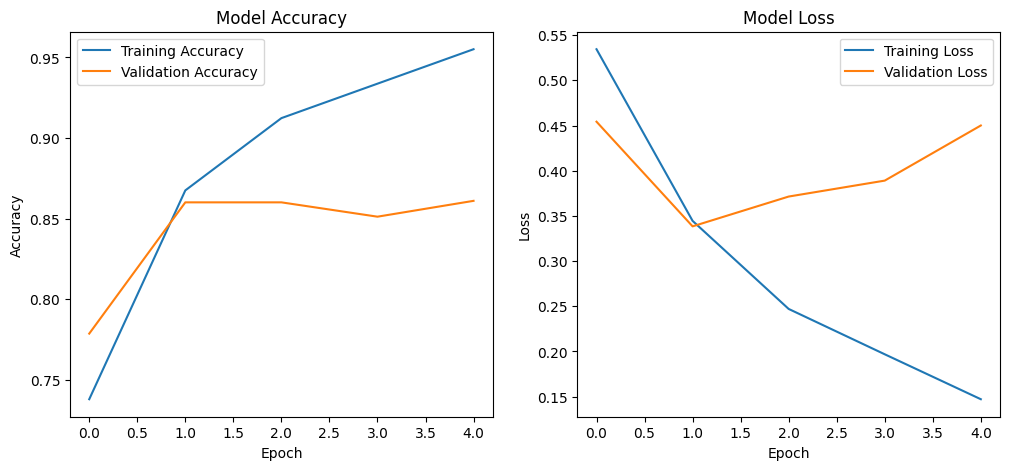

167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step


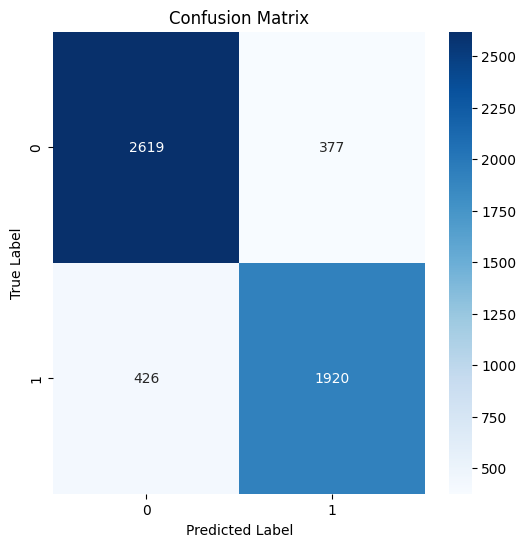

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      2996
           1       0.84      0.82      0.83      2346

    accuracy                           0.85      5342
   macro avg       0.85      0.85      0.85      5342
weighted avg       0.85      0.85      0.85      5342



In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Visualisasi Akurasi dan Loss
plt.figure(figsize=(12,5))

# Plot Akurasi
plt.subplot(1,2,1)
plt.plot(final_history.history['accuracy'], label='Training Accuracy')
plt.plot(final_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(final_history.history['loss'], label='Training Loss')
plt.plot(final_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Analisis Error: Confusion Matrix dan Classification Report
# Prediksi label untuk test set
y_pred_probs = final_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)